# Problem Statement :

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

# Aim :

__To Predict Primary Fuel And Capacity_mw For Global Power Plant Dataset.__

    1. To predict Primary Fuel i have to use classification models.
    2. To predict Capacity_mw i have to use regression models.

In [1]:
# Importing the first required libraries

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

And rest of the libraries will be imported according to our requirements as we proceed further into the project

In [2]:
#To display all the columns at once

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
# Getting the dataset

df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


__<font color=darkorange>Now let's understand the various features of this dataset :</font>__

1.__`country`__(text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification.

2.__`country_long`__(text): Longer form of the country designation

3.__`name`__(text): Name or title of the power plant, generally in Romanized form

4.__`gppd_idnr`__(text): 10 or 12 character identifier for the power plant

5.__`capacity_mw`__(number): Electrical generating capacity in megawatts

6.__`latitude`__(number): Geolocation in decimal degrees; WGS84 (EPSG:4326)

7.__`longitude`__(number): Geolocation in decimal degrees; WGS84 (EPSG:4326)

8.__`primary_fuel`__(text): Energy source used in primary electricity generation or export

9.__`other_fuel1`__(text): Energy source used in electricity generation or export

10.__`other_fuel2`__(text): Energy source used in electricity generation or export

11.__`other_fuel3`__(text): Energy source used in electricity generation or export

12.__`commissioning_year`__(number): Year of plant operation, weighted by unit-capacity when data is available

13.__`owner`__(text): Majority shareholder of the power plant, generally in Romanized form

14.__`source`__(text): Entity reporting the data; could be an organization, report, or document, generally in Romanized form

15.__`url`__(text): Web document corresponding to the source field

16.__`geolocation_source`__(text): Attribution for geolocation information

17.__`wepp_id`__(text): A reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

18.__`year_of_capacity_data`__(number): Year the capacity information was reported

19.__`generation_gwh_2013`__(number): Electricity generation in gigawatt-hours reported for the year 2013

20.__`generation_gwh_2014`__(number): Electricity generation in gigawatt-hours reported for the year 2014

21.__`generation_gwh_2015`__(number): Electricity generation in gigawatt-hours reported for the year 2015

22.__`generation_gwh_2016`__(number): Electricity generation in gigawatt-hours reported for the year 2016

23.__`generation_gwh_2017`__(number): Electricity generation in gigawatt-hours reported for the year 2017

24.__`generation_gwh_2018`__(number): Electricity generation in gigawatt-hours reported for the year 2018

25.__`generation_gwh_2019`__(number): Electricity generation in gigawatt-hours reported for the year 2019

26.__`generation_data_source`__(text): Attribution for the reported generation information

27.__`estimated_generation_gwh_2013`__(number): Estimated electricity generation in gigawatt-hours for the year 2013

28.__`estimated_generation_gwh_2014`__(number): Estimated electricity generation in gigawatt-hours for the year 2014 

29.__`estimated_generation_gwh_2015`__(number): Estimated electricity generation in gigawatt-hours for the year 2015 

30.__`estimated_generation_gwh_2016`__(number): Estimated electricity generation in gigawatt-hours for the year 2016 

31.__`estimated_generation_gwh_2017`__(number): Estimated electricity generation in gigawatt-hours for the year 2017 

32.__`estimated_generation_note_2013`__(text): Label of the model/method used to estimate generation for the year 2013

33.__`estimated_generation_note_2014`__(text): Label of the model/method used to estimate generation for the year 2014 

34.__`estimated_generation_note_2015`__(text): Label of the model/method used to estimate generation for the year 2015

35.__`estimated_generation_note_2016`__(text): Label of the model/method used to estimate generation for the year 2016

36.__`estimated_generation_note_2017`__(text): Label of the model/method used to estimate generation for the year 2017 

# Exploratory Data Analysis :

In [4]:
# Checking shape of the dataset

df.shape

(907, 27)

__From here we can drop some columns which are not helpful for our machine learning models :__

In [5]:
df.drop(['country','country_long', 'other_fuel1','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh','year_of_capacity_data'],axis=1,inplace=True)

In [6]:
df.drop(['name','gppd_idnr','owner','url'], axis=1, inplace= True)

1. 'country' and 'country_long' are dropped because they have the same value for all rows.
2. 'other_fuel1','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019', 'estimated_generation_gwh','year_of_capacity_data' are deleted due to presence of null values only.
3. 'name','gppd_idnr','owner','url' are not necessary for machine learning models, hence dropped.

In [7]:
df.shape

(907, 13)

In [8]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

In [9]:
# Checking datatype of the dataset

df.dtypes

capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
commissioning_year        float64
source                     object
geolocation_source         object
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

_Out of 13 features, only 4 are object datatype and rest are float datatype, which signifies categorical data._

In [10]:
# Getting more information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             907 non-null    float64
 1   latitude                861 non-null    float64
 2   longitude               861 non-null    float64
 3   primary_fuel            907 non-null    object 
 4   commissioning_year      527 non-null    float64
 5   source                  907 non-null    object 
 6   geolocation_source      888 non-null    object 
 7   generation_gwh_2014     398 non-null    float64
 8   generation_gwh_2015     422 non-null    float64
 9   generation_gwh_2016     434 non-null    float64
 10  generation_gwh_2017     440 non-null    float64
 11  generation_gwh_2018     448 non-null    float64
 12  generation_data_source  449 non-null    object 
dtypes: float64(9), object(4)
memory usage: 92.2+ KB


_Here we can observe some presence of null values, which will be treated later on._

_And memory used by the dataset is 92.2+ KB._

In [11]:
df.drop(['generation_data_source'],axis=1,inplace=True)

In [12]:
# Checking for null values

df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

_Lots of null values are present in this dataset and hence needs to be replaced._

In [13]:
df['latitude'].fillna(value=df['latitude'].mean(), inplace= True)
df['longitude'].fillna(value=df['longitude'].mean(), inplace= True) 

In [14]:
df['generation_gwh_2014'].fillna(value=df['generation_gwh_2014'].median(), inplace= True)
df['generation_gwh_2015'].fillna(value=df['generation_gwh_2015'].median(), inplace= True)
df['generation_gwh_2016'].fillna(value=df['generation_gwh_2016'].median(), inplace= True)
df['generation_gwh_2017'].fillna(value=df['generation_gwh_2017'].median(), inplace= True)
df['generation_gwh_2018'].fillna(value=df['generation_gwh_2018'].median(), inplace= True)

In [15]:
df.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

_All the necessary feature null values are replaced._

We can also visualize and check :

In [16]:
# First importing the seaborn library

import seaborn as sns

<AxesSubplot:>

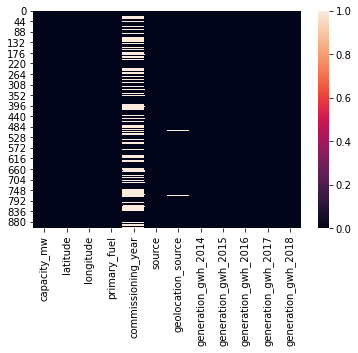

In [17]:
sns.heatmap(df.isnull())

In [18]:
#Checking for unique values in each feature

df.nunique()

capacity_mw            361
latitude               837
longitude              828
primary_fuel             8
commissioning_year      73
source                 191
geolocation_source       3
generation_gwh_2014    372
generation_gwh_2015    397
generation_gwh_2016    404
generation_gwh_2017    409
generation_gwh_2018    411
dtype: int64

_Only 2 features are categorical : "primary_fuel" and "geolocation_source"._

# Exploring output variable :

In [19]:
df.primary_fuel.unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [20]:
df.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

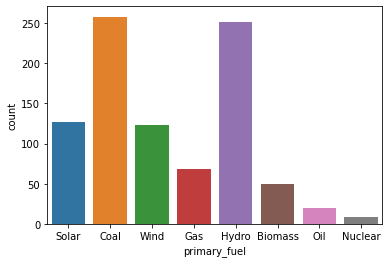

In [21]:
sns.countplot(x='primary_fuel', data=df)

__<font color=orange>Here we can observe highly imbalanced data in our target. This will be balanced using  SMOTE technique in the later part of the project.</font>__

# Univariate Analysis :

In [22]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

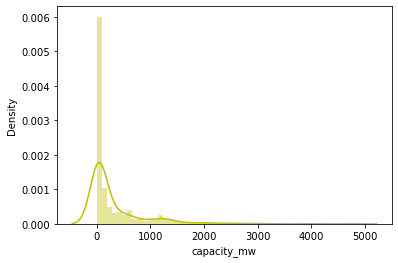

In [23]:
sns.distplot(df['capacity_mw'], color='y')

_The density for Electrical generating capacity is less. And the data is skewed. Outliers may be present._

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

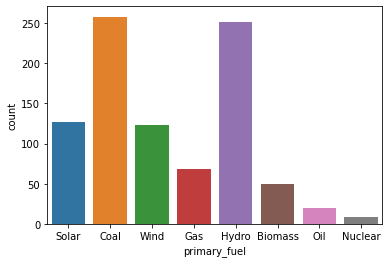

In [24]:
sns.countplot(x='primary_fuel', data=df)

_The highest produced fuels in India are coal and hydro._

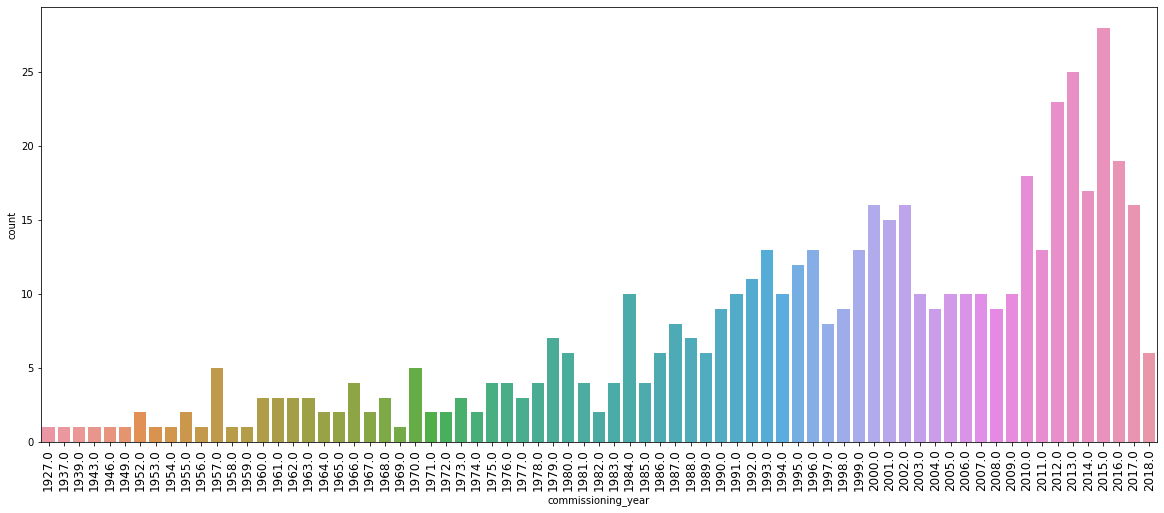

In [25]:
plt.figure(figsize=(20,8))
sns.countplot(df['commissioning_year'])
plt.xticks(fontsize= 12)
plt.xticks(rotation=90)
plt.show()

__Observations :__

_1. Power plants in India commisioned since 1927._

_2. There is was minimum growth in the starting._

_3. But since 1957 production of power plants increased._

_4. And in 2015 reached its highest peak of power plants._

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

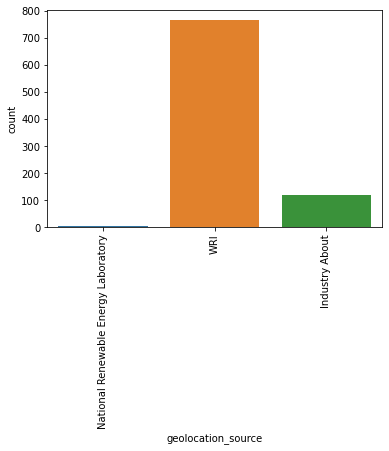

In [26]:
plt.xticks(rotation=90)
sns.countplot(x='geolocation_source', data=df)

_Geolocation source information is mostly from WRI._

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

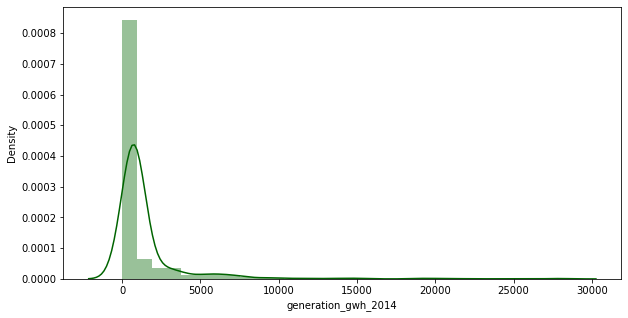

In [27]:
plt.figure(figsize=(10,5))
sns.distplot(df['generation_gwh_2014'], color='darkgreen')

_Data is not normally distributed and is right skewed._

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

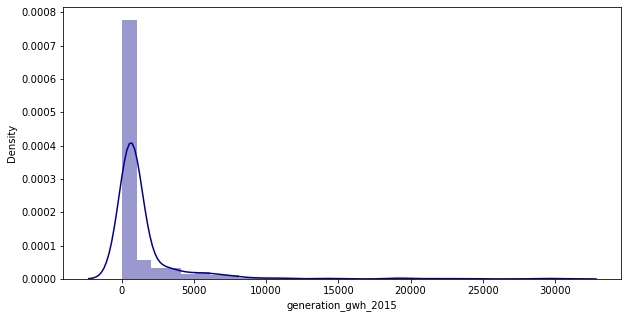

In [28]:
plt.figure(figsize=(10,5))
sns.distplot(df['generation_gwh_2015'], color='darkblue')

_Data is not normally distributed and is right skewed._

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

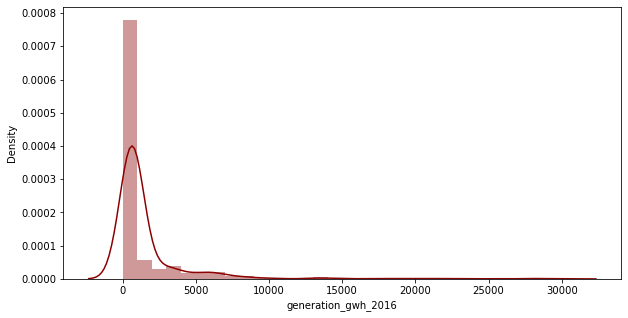

In [29]:
plt.figure(figsize=(10,5))
sns.distplot(df['generation_gwh_2016'], color='darkred')

_Data is not normally distributed and is right skewed._

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

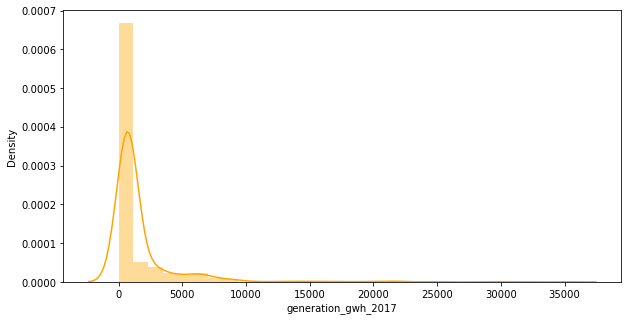

In [30]:
plt.figure(figsize=(10,5))
sns.distplot(df['generation_gwh_2017'], color='orange')

_Data is not normally distributed and is right skewed._

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='Density'>

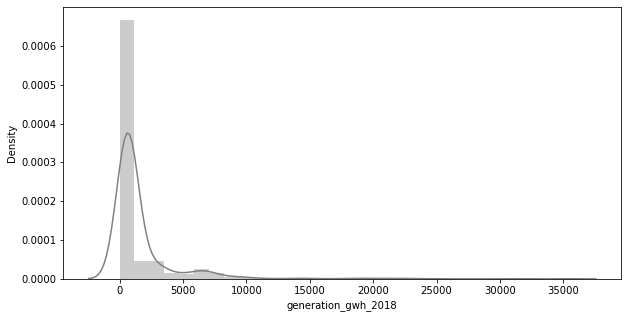

In [31]:
plt.figure(figsize=(10,5))
sns.distplot(df['generation_gwh_2018'], color='grey')

_Data is not normally distributed and is right skewed._

# Bivariate Analysis :

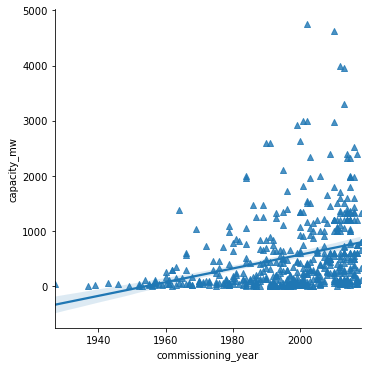

In [32]:
sns.lmplot(x='commissioning_year',y='capacity_mw', data=df, markers='^')

_With the increase in commissioning of power plants gradually, capacity is also increasing. That is "commissioning_year" &  "capacity_mw" are directly proportional._

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

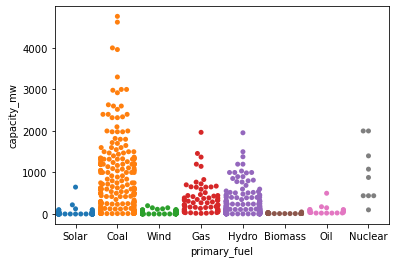

In [33]:
sns.swarmplot(data=df, x='primary_fuel',y='capacity_mw')

_Coal contributes highly to electrical generation capacity._

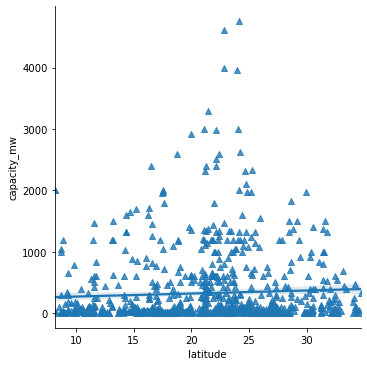

In [34]:
sns.lmplot(x='latitude',y='capacity_mw', data=df, markers='^')

_Not much relation can be observed between latitude location and capacity._

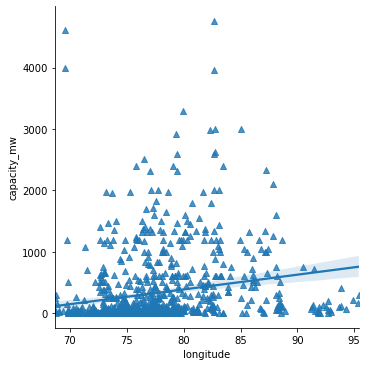

In [35]:
sns.lmplot(x='longitude',y='capacity_mw', data=df, markers='^')

_Capacity and longitude are directly proportional, with increase in longitude locations, electrical generating capacity also increases._

In [36]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

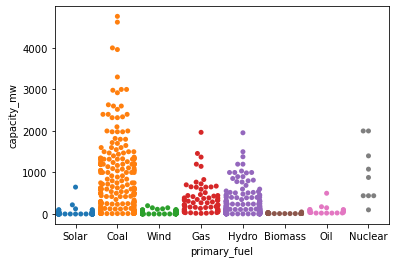

In [37]:
sns.swarmplot(data=df, x='primary_fuel',y='capacity_mw')

_Coal contributes the highest for electrical generating capacity._

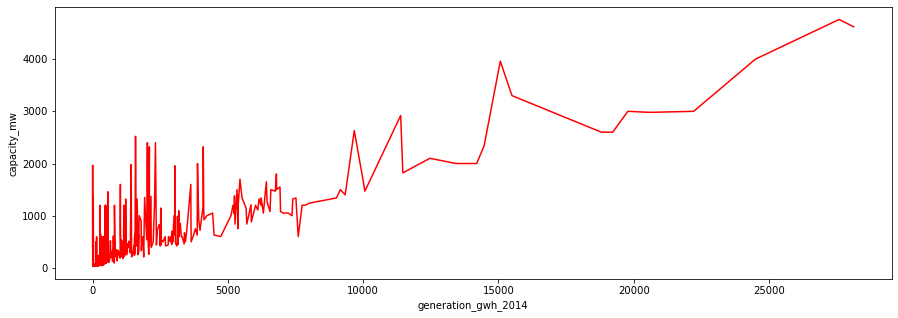

In [38]:
plt.figure(figsize=(15,5))
sns.lineplot(x="generation_gwh_2014", y="capacity_mw", data=df, color='red')
plt.show()

_With increase in Electricity generation in gigawatt-hours reported for the year 2014, Electrical generating capacity also increased._

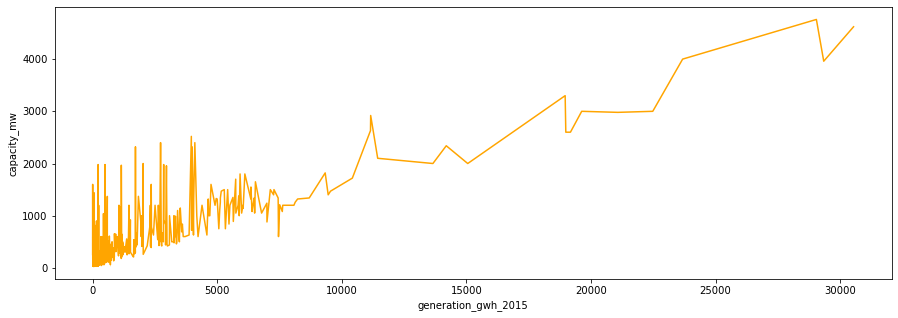

In [39]:
plt.figure(figsize=(15,5))
sns.lineplot(x="generation_gwh_2015", y="capacity_mw", data=df, color='orange')
plt.show()

_With increase in Electricity generation in gigawatt-hours reported for the year 2015, Electrical generating capacity also increased._

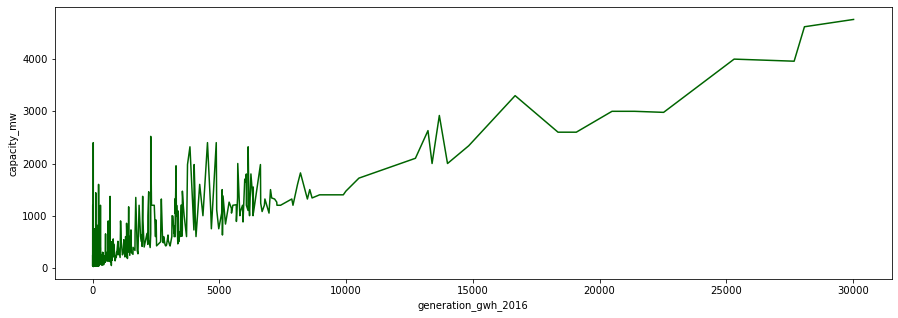

In [40]:
plt.figure(figsize=(15,5))
sns.lineplot(x="generation_gwh_2016", y="capacity_mw", data=df, color='darkgreen')
plt.show()

_With increase in Electricity generation in gigawatt-hours reported for the year 2016, Electrical generating capacity also increased._

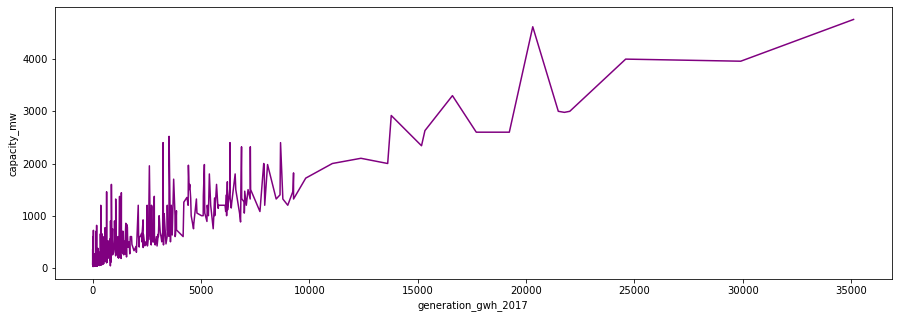

In [41]:
plt.figure(figsize=(15,5))
sns.lineplot(x="generation_gwh_2017", y="capacity_mw", data=df, color='purple')
plt.show()

_With increase in Electricity generation in gigawatt-hours reported for the year 2017, Electrical generating capacity also increased._

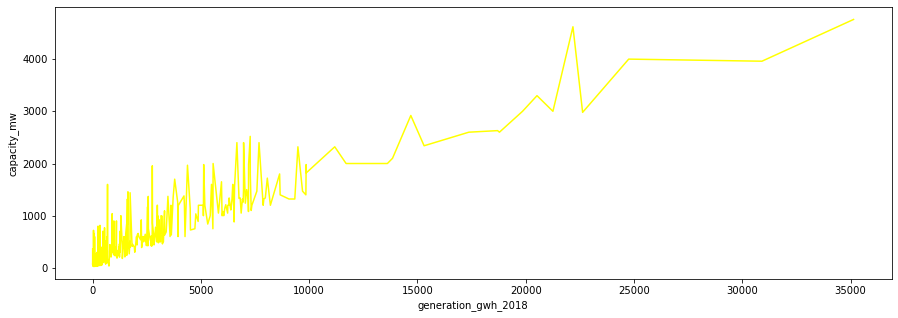

In [42]:
plt.figure(figsize=(15,5))
sns.lineplot(x="generation_gwh_2018", y="capacity_mw", data=df, color='yellow')
plt.show()

_With increase in Electricity generation in gigawatt-hours reported for the year 2018, Electrical generating capacity also increased._

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

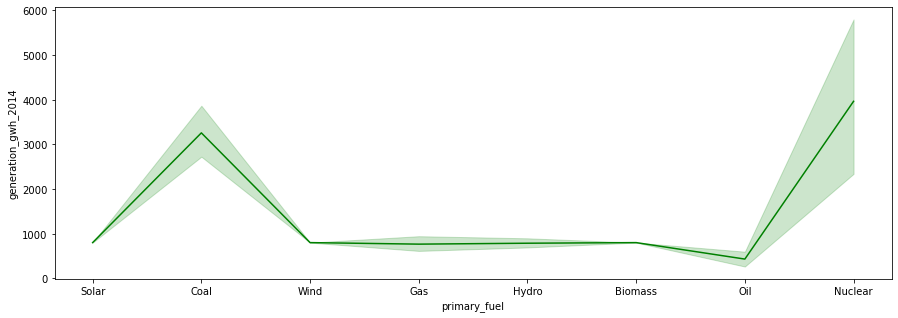

In [43]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x='primary_fuel',y='generation_gwh_2014', color='green')

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

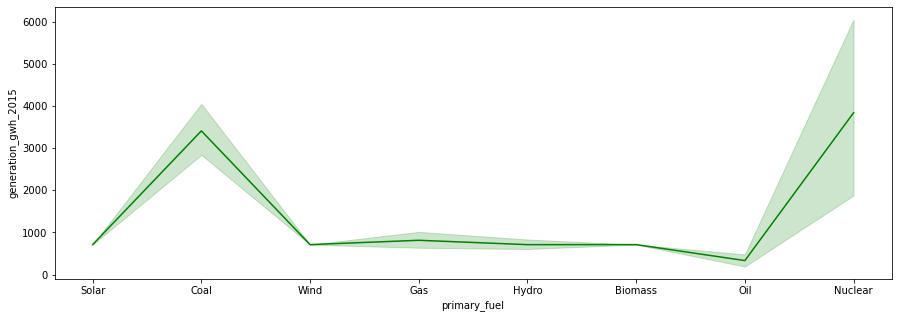

In [44]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x='primary_fuel',y='generation_gwh_2015', color='green')

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

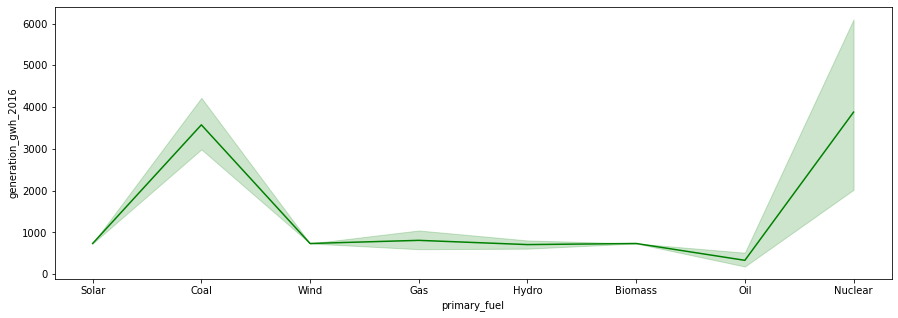

In [45]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x='primary_fuel',y='generation_gwh_2016', color='green')

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

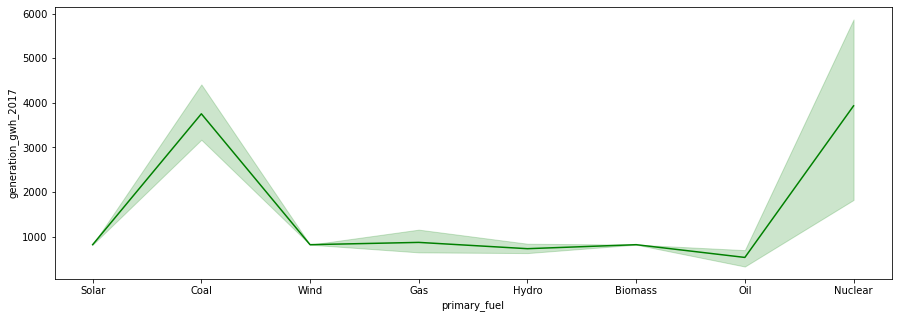

In [46]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x='primary_fuel',y='generation_gwh_2017', color='green')

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2018'>

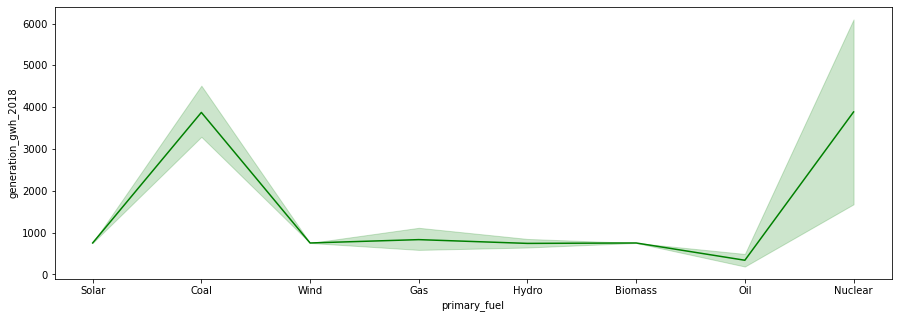

In [47]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x='primary_fuel',y='generation_gwh_2018', color='green')

_From all the above plotting with "primary_fuel", it is observed that coal has been the primary fuel for electricity generation since 2014 upto 2018._

# Multivariate Analysis :

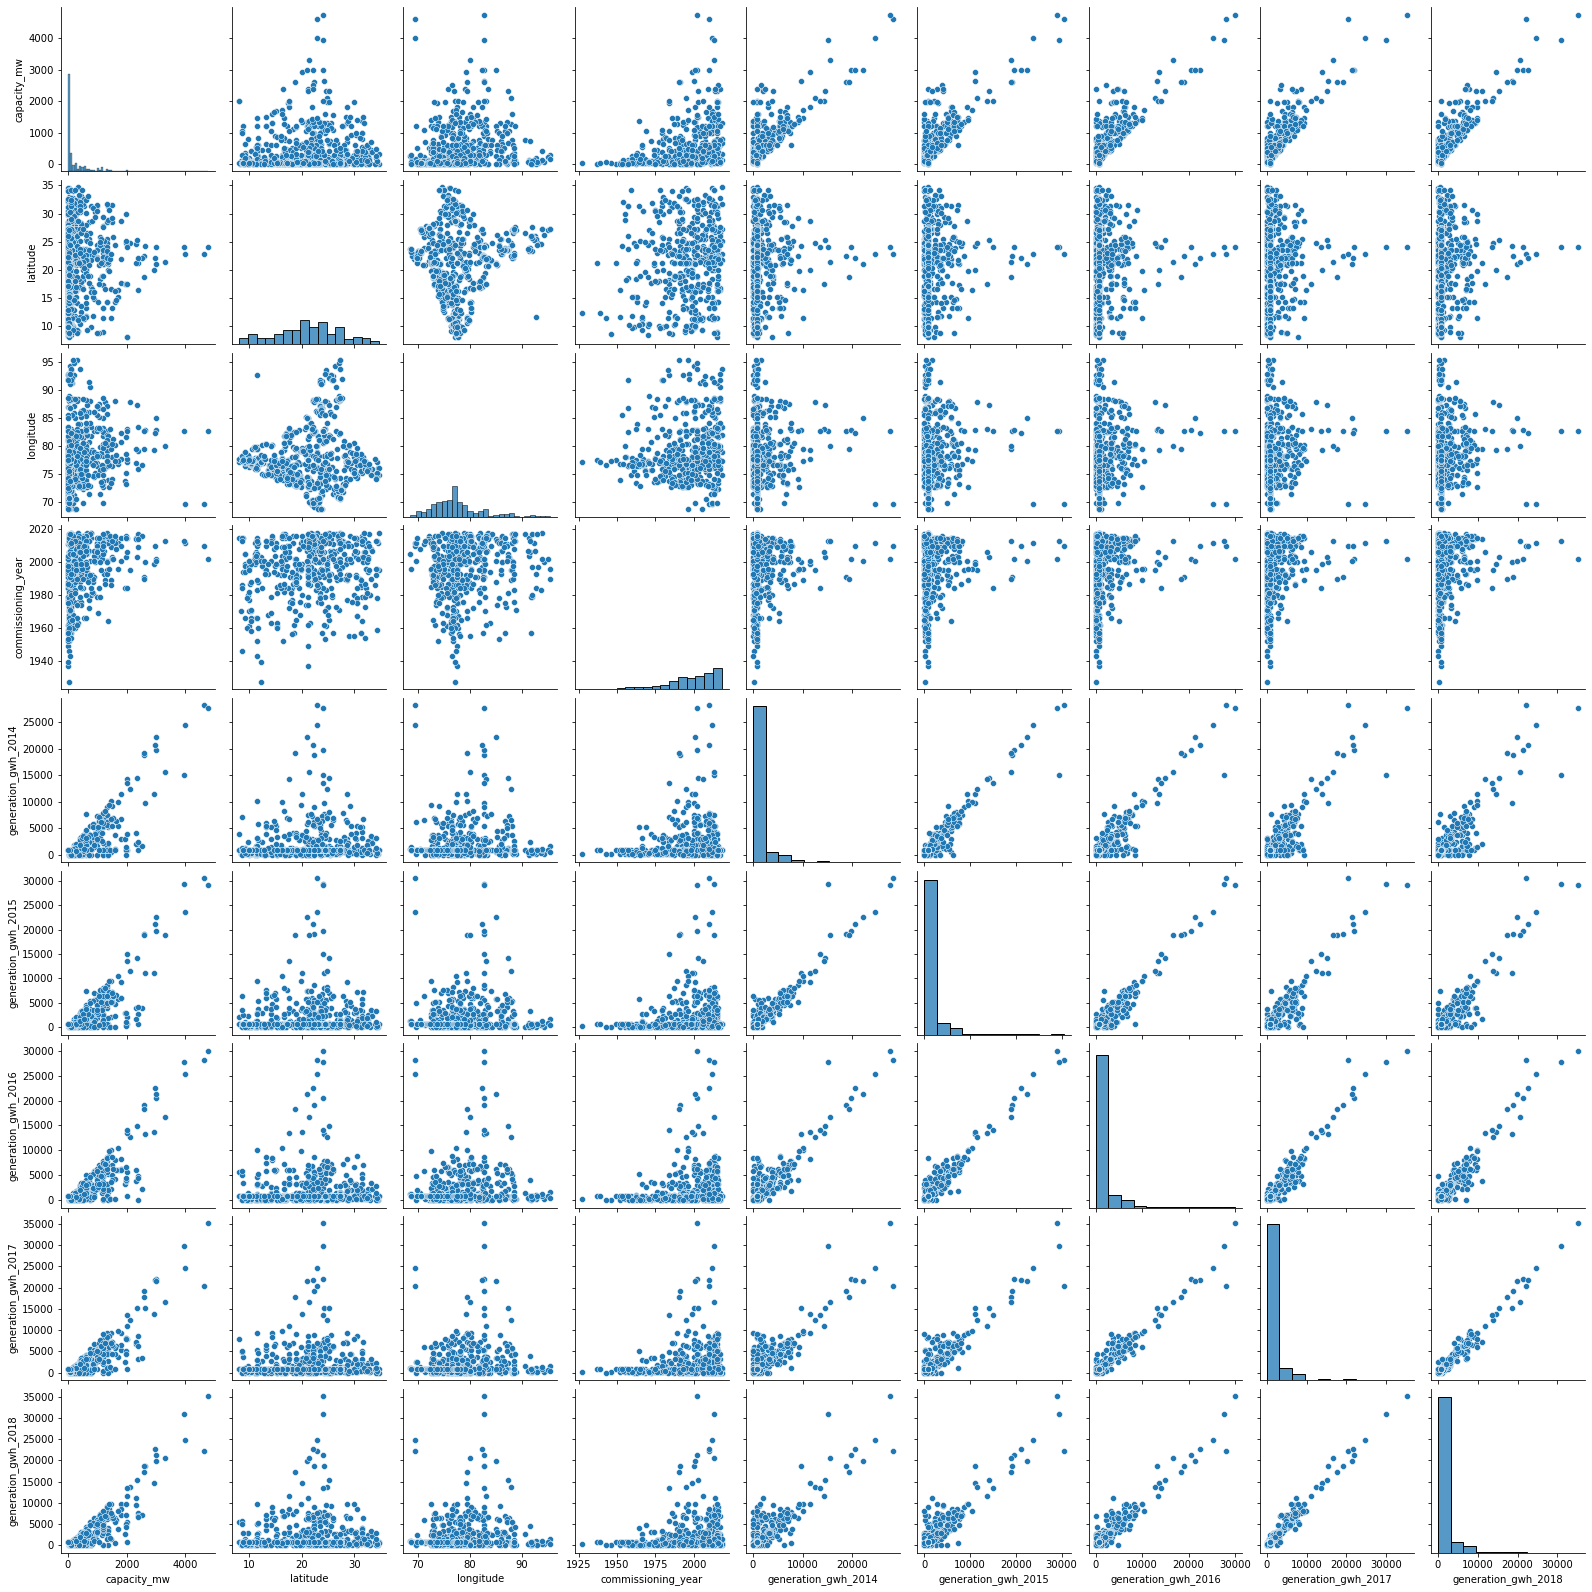

In [48]:
sns.pairplot(df)

__We can drop 'source' column as it is of not much help to us for our machine learning.__

In [49]:
df.drop(['source'], axis=1, inplace=True)

In [50]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,Coal,NaN,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,Wind,NaN,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,Gas,2004.0,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


# Label Encoder :

In [51]:
from sklearn import preprocessing

In [52]:
le = preprocessing.LabelEncoder()

In [53]:
df['primary_fuel']=le.fit_transform(df['primary_fuel'])
df['geolocation_source']=le.fit_transform(df['geolocation_source'])

In [54]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,1,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1,NaN,2,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7,NaN,2,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2,2004.0,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


_So all the features are converted into numeric form._

In [55]:
# Checking various factors of the dataset

df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,907.0,21.197918,6.079148,8.1689,17.072000,21.281800,25.176450,34.649
longitude,907.0,77.464907,4.812291,68.6447,74.388900,76.979200,79.206100,95.408
primary_fuel,907.0,3.206174,2.280652,0.0000,1.000000,3.000000,6.000000,7.000
commissioning_year,527.0,1997.091082,17.082868,1927.0000,1988.000000,2001.000000,2012.000000,2018.000
geolocation_source,907.0,1.754135,0.700183,0.0000,2.000000,2.000000,2.000000,3.000
generation_gwh_2014,907.0,1516.689956,2785.604307,0.0000,801.123775,801.123775,801.123775,28127.000
generation_gwh_2015,907.0,1510.071296,2984.994556,0.0000,711.181225,711.181225,711.181225,30539.000
generation_gwh_2016,907.0,1565.361383,3005.087210,0.0000,737.205450,737.205450,737.205450,30015.000
generation_gwh_2017,907.0,1657.121797,3046.862910,0.0000,817.977250,817.977250,817.977250,35116.000


__Observations :__

1. "capacity_mw", "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017", "generation_gwh_2018" has skewness, as the mean value is greater than median in these features.

2. All the features are having outliers due to much difference between 75th percentile and max values.

In [56]:
# Checking Skewness of the dataset

df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
primary_fuel           0.472251
commissioning_year    -1.067949
geolocation_source    -1.920302
generation_gwh_2014    5.321360
generation_gwh_2015    5.566773
generation_gwh_2016    5.281953
generation_gwh_2017    5.315103
generation_gwh_2018    5.133226
dtype: float64

_The data is fairly symmetrical if the skewness is between +/-0.5._

_If the skewness is between -1 and – 0.5 or between 0.5 and 1, then there is a little decent skewness._

_If the skewness is less than -1 or greater than 1, the data are highly skewed._

__Observation :__

High skewness can be seen in most of the columns.

So we need to handle these column as they are highly skewed. But before doing that we need the check the correlation of these features with both our targets.

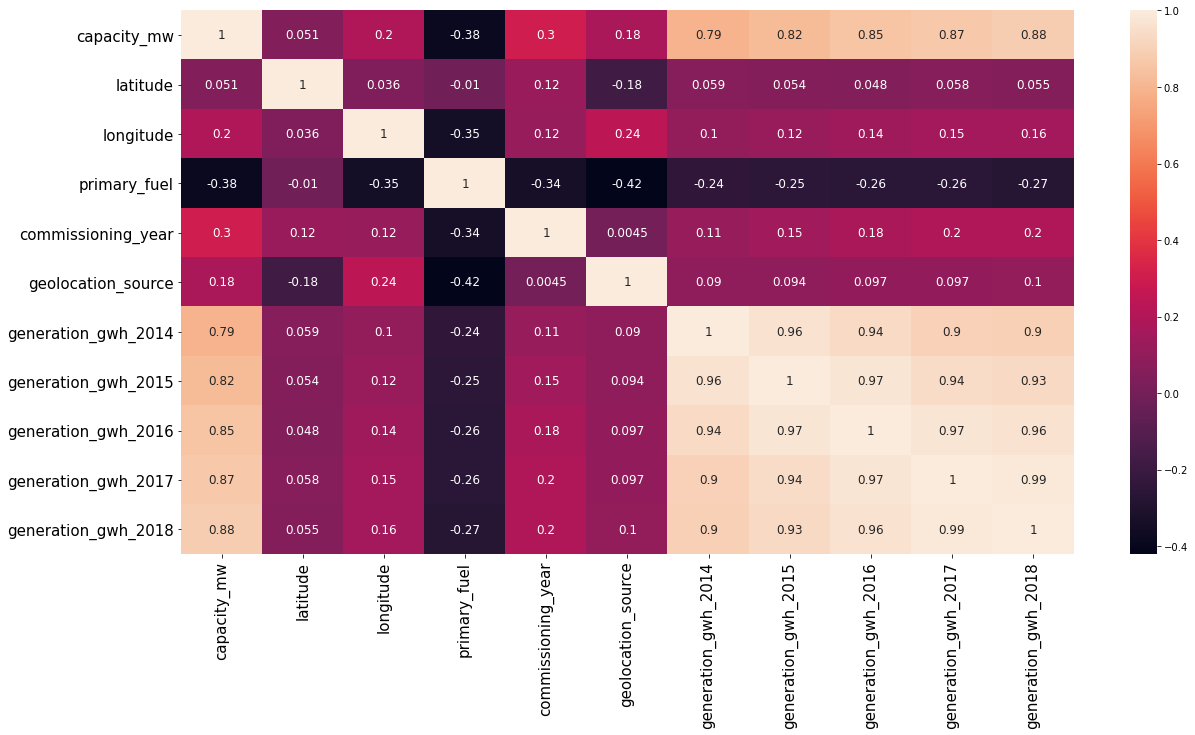

In [57]:
# Checking correlation

corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, annot_kws={'size':12})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

_Now these are positively correlated with "capacity_mw", but has neagtive correlation with "primary_fuel". This skewness can be handled in the later part of the project._

# Detecting Outliers :

capacity_mw                AxesSubplot(0.125,0.71587;0.227941x0.16413)
latitude                AxesSubplot(0.398529,0.71587;0.227941x0.16413)
longitude               AxesSubplot(0.672059,0.71587;0.227941x0.16413)
primary_fuel              AxesSubplot(0.125,0.518913;0.227941x0.16413)
commissioning_year     AxesSubplot(0.398529,0.518913;0.227941x0.16413)
geolocation_source     AxesSubplot(0.672059,0.518913;0.227941x0.16413)
generation_gwh_2014       AxesSubplot(0.125,0.321957;0.227941x0.16413)
generation_gwh_2015    AxesSubplot(0.398529,0.321957;0.227941x0.16413)
generation_gwh_2016    AxesSubplot(0.672059,0.321957;0.227941x0.16413)
generation_gwh_2017          AxesSubplot(0.125,0.125;0.227941x0.16413)
generation_gwh_2018       AxesSubplot(0.398529,0.125;0.227941x0.16413)
dtype: object

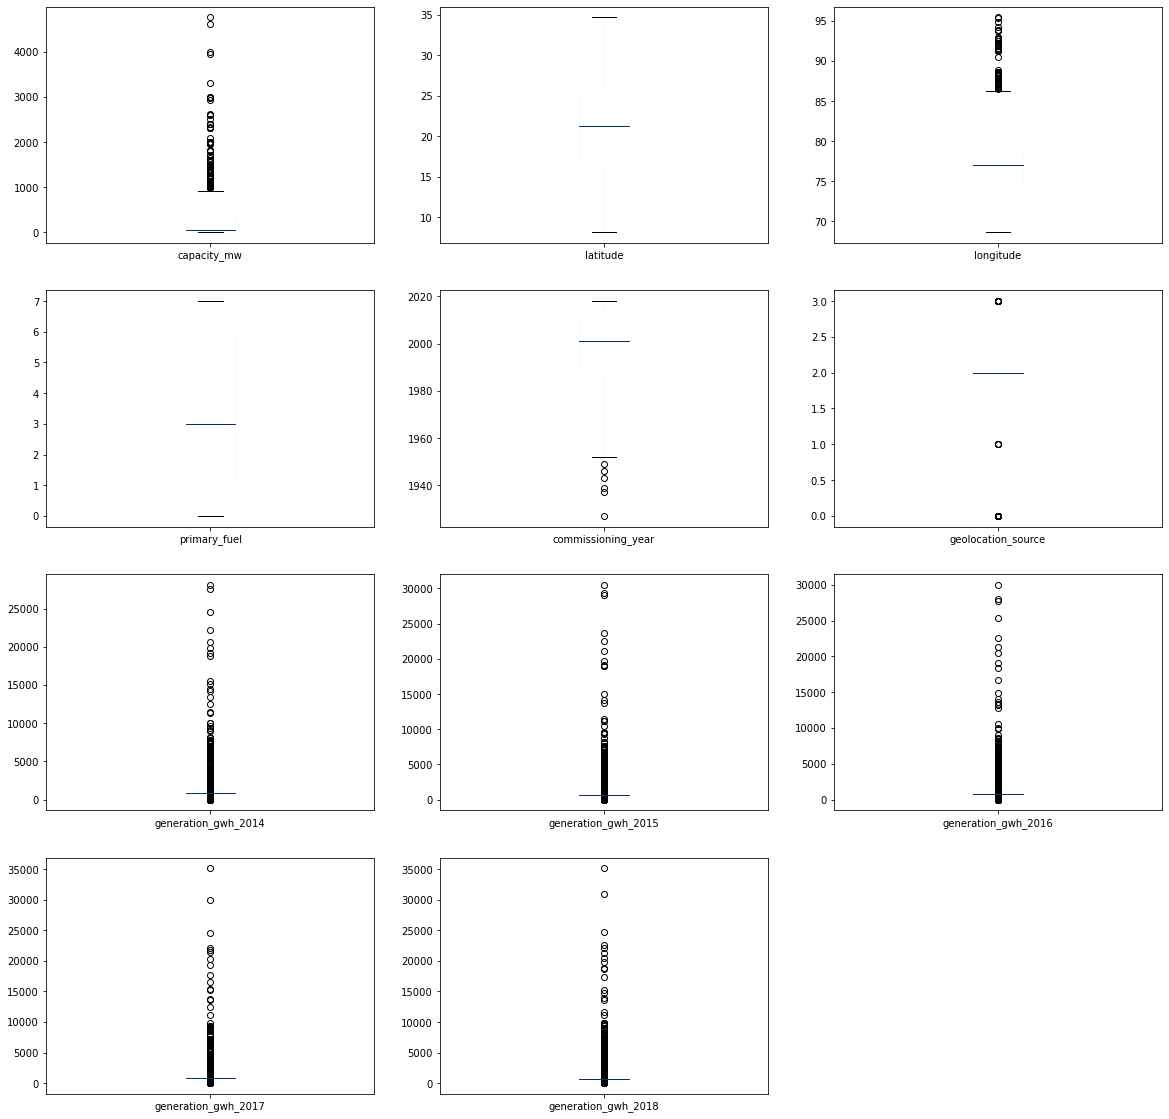

In [58]:
df.plot(kind='box', subplots=True, layout=(4,3), figsize=(20,20), colormap='Blues')

Through this visualizations, the outliers are clearly visible.

And we need to remove them.

In [74]:
df['commissioning_year'].fillna(value=df['commissioning_year'].median(), inplace= True)

In [75]:
# Importing required zscore library

from scipy.stats import zscore
import numpy as np

In [76]:
z=np.abs(zscore(df))

In [77]:
threshold=3

In [78]:
df_new=df[(z<3).all(axis=1)] 

In [79]:
print('Shape of original dataframe', df.shape)

Shape of original dataframe (907, 11)


In [80]:
print('Shape of dataframe after outliers removal', df_new.shape)

Shape of dataframe after outliers removal (846, 11)


In [81]:
# Data loss percentage

loss=((907-846)/907)*100
print('Data loss percentage ',loss)

Data loss percentage  6.725468577728775


Here we can see the difference between our original df shape and df_new shape, and the percentage of data loss. Much of the outliers are removed with 6% and we can't afford to lose more data and will proceed further with these values.

In [82]:
df=df_new
df.shape

(846, 11)

# Classification models to predict Primary Fuel :

In [83]:
# Data part

x=df.drop('primary_fuel',axis=1)
x.head(1)

,capacity_mw,latitude,longitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,2011.0,1,801.123775,711.181225,737.20545,817.97725,751.644375


In [84]:
# Target

y=df.primary_fuel
y.head()

0    6
1    1
2    7
3    2
4    1
Name: primary_fuel, dtype: int32

# Variance Inflation Factor :
__<font color=orange>It helps us to eliminate multi co-linearity.</font>__

In [69]:
# Importing required library for variance inflation factor.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [86]:
vif_calc()

   VIF Factor             Features
0    4.251665          capacity_mw
1   13.796901             latitude
2  364.081558            longitude
3  358.659570   commissioning_year
4    7.977518   geolocation_source
5   10.692681  generation_gwh_2014
6   21.006766  generation_gwh_2015
7   24.640934  generation_gwh_2016
8   32.397179  generation_gwh_2017
9   28.295619  generation_gwh_2018


Now, here we will find the highest values, which are "longitude", "commissioning_year".

Now we need to check the individual impact on the target[primary_fuel], from these attributes.

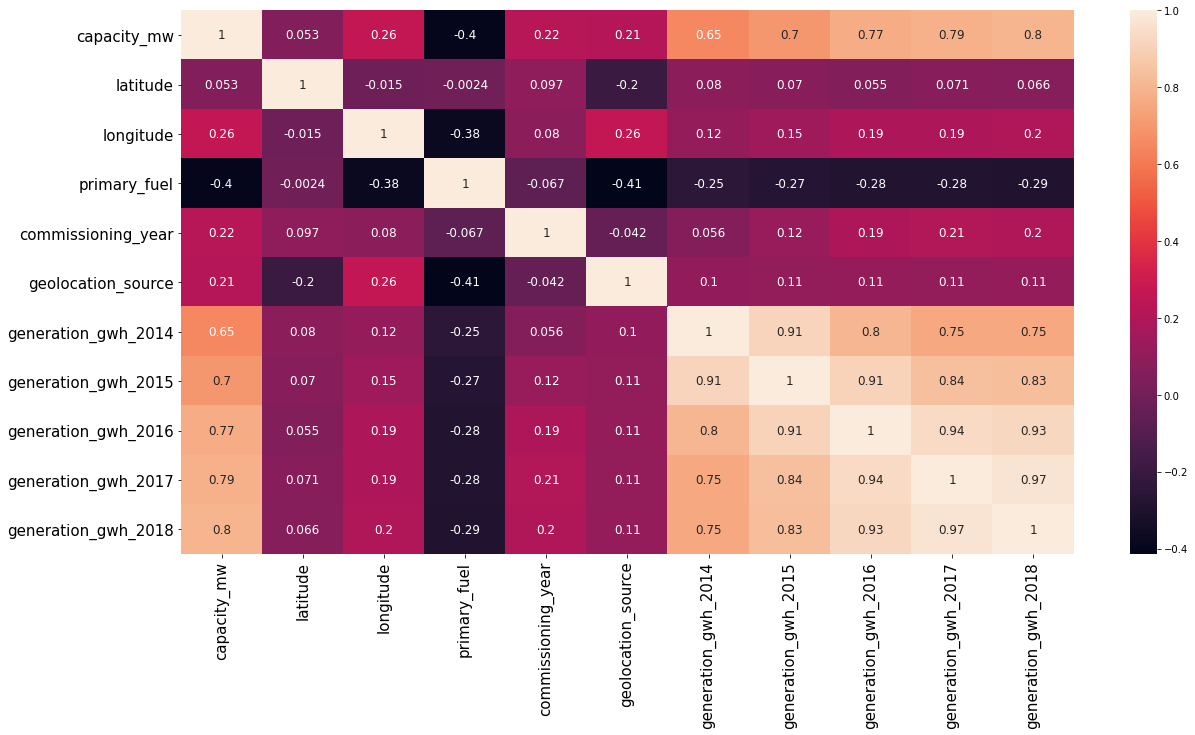

In [88]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, annot_kws={'size':12})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

_From here we can know that "longitude" is negatively correlated with our target and also has a very high variance factor. Hence it can be dropped._

In [89]:
df.drop(['longitude'], axis=1, inplace=True)

In [90]:
df.head(1)

,capacity_mw,latitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,6,2011.0,1,801.123775,711.181225,737.20545,817.97725,751.644375


Successfully dropped.

# Feature Scaling :
__<font color=orange>To transform the dataset into same format, so that we have a uniform dataset.</font>__

In [91]:
# Importing required scaler library

from sklearn.preprocessing import StandardScaler

In [92]:
scale=StandardScaler()
x=pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x.head(10)

,capacity_mw,latitude,longitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.628362,1.162213,-0.884486,1.017502,-1.027592,-0.274829,-0.301614,-0.306339,-0.298643,-0.315789
1,-0.400491,0.601048,-0.566725,0.117077,0.363357,-0.274829,-0.301614,-0.306339,-0.298643,-0.315789
2,-0.540793,0.131029,-1.782637,0.117077,0.363357,-0.274829,-0.301614,-0.306339,-0.298643,-0.315789
3,-0.312205,0.454073,3.323413,0.387204,0.363357,-0.398047,-0.215337,-0.213206,-0.392440,-0.389186
4,3.660634,0.140306,1.244695,1.377672,0.363357,1.226920,3.086059,3.139707,2.479704,3.504514
5,-0.037805,0.437276,-1.951817,0.477247,0.363357,-0.038051,0.022283,-0.031847,-0.097952,-0.184096
6,-0.491162,-1.748900,-0.009651,-2.674243,0.363357,-0.707366,-0.665417,-0.729308,-0.741677,-0.727423
7,-0.176198,1.825888,0.036610,0.927460,0.363357,-0.360005,-0.295005,-0.344819,-0.382817,-0.416647
8,0.057638,-0.784183,-0.270097,0.387204,0.363357,-0.490255,-0.670468,-0.516123,-0.528938,-0.517865
9,-0.133249,0.337985,1.065460,0.747375,0.363357,0.455592,0.304868,0.069753,0.154812,0.115112


# Power Transformation :
I will use Yeo-Johnson to transform this dataset so that the resulting features looks more normally distributed. And also reduce skewness and outliers.

In [93]:
# First importing the required library for power transformation

from sklearn.preprocessing import PowerTransformer

In [94]:
power=PowerTransformer(method='yeo-johnson')
x=pd.DataFrame(power.fit_transform(x), columns=x.columns)
x.head()

,capacity_mw,latitude,longitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.987892,1.178549,-0.939530,1.210496,-1.291234,0.012162,-0.016303,-0.019400,-0.001281,-0.038795
1,-0.125941,0.583709,-0.507593,-0.064019,0.205338,0.012162,-0.016303,-0.019400,-0.001281,-0.038795
2,-0.622768,0.099779,-2.344299,-0.064019,0.205338,0.012162,-0.016303,-0.019400,-0.001281,-0.038795
3,0.135614,0.430787,2.493521,0.272149,0.205338,-0.374913,0.232454,0.242984,-0.281562,-0.279812
4,1.856223,0.109177,1.225156,1.834014,0.205338,1.655976,2.001428,1.989748,1.899946,2.010873


In [95]:
# Rechecking VIF

def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [96]:
vif_calc()

   VIF Factor             Features
0    1.600863          capacity_mw
1    1.060298             latitude
2    1.215782            longitude
3    1.147972   commissioning_year
4    1.115630   geolocation_source
5    3.872521  generation_gwh_2014
6    6.065654  generation_gwh_2015
7   10.509530  generation_gwh_2016
8   12.991720  generation_gwh_2017
9   11.360546  generation_gwh_2018


__So after scaling and power transforamtion, VIF factors are balanced to an exceptable range.__

# SMOTE :
To balance the categorical imbalance in target.

In [99]:
from imblearn.over_sampling import SMOTE

In [100]:
sm = SMOTE()
x, y = sm.fit_resample(x,y)

In [101]:
y.value_counts()

0    233
1    233
2    233
3    233
4    233
5    233
6    233
7    233
Name: primary_fuel, dtype: int64

Hence the target is balanced, and now we can proceed with machine learning models.

# Machine Learning Models :
Here we have a classification case, hence we'll go with Logistic Regression and various other classification models.

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score 

# Spliting dataframe and finding best random state :

In [103]:
lr=LogisticRegression()

In [104]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
# predicting the x_train so that we can cross check how well the model is performing    
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test, pred_test)*100,1):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuracy_score is:-", accuracy_score(y_train, pred_train)*100)
        print("Testing accuracy_score is:-", accuracy_score(y_test, pred_test)*100, '\n\n')

At random state 25  The model performs very well
At random_state:- 25
Training accuracy_score is:- 61.3682092555332
Testing accuracy_score is:- 61.3941018766756 


At random state 86  The model performs very well
At random_state:- 86
Training accuracy_score is:- 60.63044936284373
Testing accuracy_score is:- 60.58981233243968 


At random state 150  The model performs very well
At random_state:- 150
Training accuracy_score is:- 60.29510395707579
Testing accuracy_score is:- 60.32171581769437 


At random state 181  The model performs very well
At random_state:- 181
Training accuracy_score is:- 59.82562038900067
Testing accuracy_score is:- 59.78552278820375 


At random state 237  The model performs very well
At random_state:- 237
Training accuracy_score is:- 60.29510395707579
Testing accuracy_score is:- 60.32171581769437 


At random state 406  The model performs very well
At random_state:- 406
Training accuracy_score is:- 59.49027498323273
Testing accuracy_score is:- 59.51742627345844 


So, we have found some of the good random state values with the help of Logistic Regression, and will select the one which gives highest accuracy.

25 random state with accuracy score 61.3

# Required Evaluation Metrices :

In [105]:
# Spliting the dataset

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=25)
# Here 20% will be used for testing purpose and rest 80% for training purpose.

In [106]:
# First we'll create list of all the classification models to be used

models=[LogisticRegression(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(),
        SVC(), # default kernel='rbf'
        SVC(kernel='poly')]

In [107]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train, y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test, predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.613941018766756
[[40  0  0  0  0  0  0  6]
 [ 4 19  5  5 13  0  0  2]
 [ 0  4 17  9  4  2  0  9]
 [ 4  7  7 16  8  4  0  3]
 [ 0  0  0  2 44  0  0  0]
 [ 0  0  2  3  0 23  0 23]
 [ 0  0  0  0  0  0 50  0]
 [14  0  1  0  0  3  0 20]]
              precision    recall  f1-score   support

           0       0.65      0.87      0.74        46
           1       0.63      0.40      0.49        48
           2       0.53      0.38      0.44        45
           3       0.46      0.33      0.38        49
           4       0.64      0.96      0.77        46
           5       0.72      0.45      0.55        51
           6       1.00      1.00      1.00        50
           7       0.32      0.53      0.40        38

    accuracy                           0.61       373
   macro avg       0.62      0.61      0.60       373
weighted avg       0.63      0.61      0.60       373



Accuracy score of DecisionTreeClassifier() is:
0.8310991957104558
[[4

# Ensemble Techniques :

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [109]:
rfc=RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy score of',rfc,'is:')
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

Accuracy score of RandomForestClassifier(random_state=42) is:
0.8873994638069705
[[42  0  0  0  0  0  0  4]
 [ 2 32  2  3  5  2  0  2]
 [ 0  5 37  0  1  1  0  1]
 [ 0  4  2 40  3  0  0  0]
 [ 0  2  0  0 44  0  0  0]
 [ 0  1  1  0  0 49  0  0]
 [ 0  0  0  0  0  0 50  0]
 [ 1  0  0  0  0  0  0 37]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        46
           1       0.73      0.67      0.70        48
           2       0.88      0.82      0.85        45
           3       0.93      0.82      0.87        49
           4       0.83      0.96      0.89        46
           5       0.94      0.96      0.95        51
           6       1.00      1.00      1.00        50
           7       0.84      0.97      0.90        38

    accuracy                           0.89       373
   macro avg       0.89      0.89      0.89       373
weighted avg       0.89      0.89      0.89       373



In [110]:
adc=AdaBoostClassifier()
adc.fit(x_train,y_train)
predadc=adc.predict(x_test)
print('Accuracy score of',adc,'is:')
print(accuracy_score(y_test,predadc))
print(confusion_matrix(y_test,predadc))
print(classification_report(y_test,predadc))

Accuracy score of AdaBoostClassifier() is:
0.2734584450402145
[[ 0  0 46  0  0  0  0  0]
 [ 0  0 48  0  0  0  0  0]
 [ 0  0 45  0  0  0  0  0]
 [ 0  0 49  0  0  0  0  0]
 [ 0  0 46  0  0  0  0  0]
 [ 0  0 51  0  0  0  0  0]
 [ 0  0  0  0  0  0 50  0]
 [ 0  0 31  0  0  0  0  7]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.00      0.00      0.00        48
           2       0.14      1.00      0.25        45
           3       0.00      0.00      0.00        49
           4       0.00      0.00      0.00        46
           5       0.00      0.00      0.00        51
           6       1.00      1.00      1.00        50
           7       1.00      0.18      0.31        38

    accuracy                           0.27       373
   macro avg       0.27      0.27      0.20       373
weighted avg       0.25      0.27      0.20       373



In [111]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict(x_test)
print('Accuracy score of',gbc,'is:')
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

Accuracy score of GradientBoostingClassifier() is:
0.8632707774798928
[[44  1  0  0  0  0  0  1]
 [ 4 34  1  3  3  2  0  1]
 [ 0  5 34  1  1  3  0  1]
 [ 0  8  4 33  4  0  0  0]
 [ 0  2  1  0 43  0  0  0]
 [ 0  1  2  0  0 47  0  1]
 [ 0  0  0  0  0  0 50  0]
 [ 1  0  0  0  0  0  0 37]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        46
           1       0.67      0.71      0.69        48
           2       0.81      0.76      0.78        45
           3       0.89      0.67      0.77        49
           4       0.84      0.93      0.89        46
           5       0.90      0.92      0.91        51
           6       1.00      1.00      1.00        50
           7       0.90      0.97      0.94        38

    accuracy                           0.86       373
   macro avg       0.86      0.87      0.86       373
weighted avg       0.86      0.86      0.86       373



So, from above all the models, we found the highest score :
    
   __Accuracy score of RandomForestClassifier(random_state=42) is: 0.8873994638069705__

# Cross validation score for RandomForestClassifier() :

In [112]:
rfc=RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(x_train,y_train)
rfc.score(x_train, y_train)
predrfc=rfc.predict(x_test)
acc=accuracy_score(y_test,predrfc)
for i in range(2,10):
    cross=cross_val_score(rfc,x,y,cv=i)
    cvs=cross.mean()
    print("At cv:-",i)
    print("Cross validation score is:-",cvs*100 )
    print('Accuracy score is:', acc*100)
    print("\n")

At cv:- 2
Cross validation score is:- 88.03648068669527
Accuracy score is: 88.73994638069705


At cv:- 3
Cross validation score is:- 90.1292387032636
Accuracy score is: 88.73994638069705


At cv:- 4
Cross validation score is:- 89.64592274678112
Accuracy score is: 88.73994638069705


At cv:- 5
Cross validation score is:- 90.39609097984952
Accuracy score is: 88.73994638069705


At cv:- 6
Cross validation score is:- 90.18324516820525
Accuracy score is: 88.73994638069705


At cv:- 7
Cross validation score is:- 91.20272591591338
Accuracy score is: 88.73994638069705


At cv:- 8
Cross validation score is:- 90.34334763948497
Accuracy score is: 88.73994638069705


At cv:- 9
Cross validation score is:- 90.82848177051078
Accuracy score is: 88.73994638069705




At cv=2 Cross val score and Accuracy Score are same, that is model is perfoming well.

In [113]:
score_selected= cross_val_score(rfc,x,y,cv=2).mean()
print ("The cv score is: ", score_selected, "\nThe accuracy score is: ",acc)

The cv score is:  0.8803648068669527 
The accuracy score is:  0.8873994638069705


# Hyper Parameter Tuning :
Applying hyper parameter tuning using Grid Search CV method, to find the best parameters of RandomForestClassifier()

In [ ]:
RandomForestClassifier(n_estimators=100,
    criterion={"gini", "entropy"},
    max_features={"auto", "sqrt", "log2"},
    class_weight={"balanced", "balanced_subsample"})

_These are the some of the parameters for RandomForestClassifier(), which i found by clicking shift+tab buttons inside the function._

_First we have to create a dictionary of these parameters so that it can be passsed to the grid search function._

In [114]:
params={'n_estimators':[100],
    'criterion':["gini", "entropy"],
    'max_features':["auto", "sqrt", "log2"],
    'class_weight':["balanced", "balanced_subsample"]}

In [115]:
grid=GridSearchCV(RandomForestClassifier(), params, cv=2)

In [116]:
grid.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100]})

In [117]:
grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_features': 'auto',
 'n_estimators': 100}

So here we have found the best parameters for our model, and now we can finally train our model.

In [118]:
RFC=RandomForestClassifier(class_weight='balanced',
                           criterion='entropy',
                           max_features='auto',
                           n_estimators=100)

In [119]:
RFC.fit(x_train,y_train)
RFC.score(x_train, y_train)
pred=RFC.predict(x_test)
print('Accuracy score of',RFC,'is:')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))
print('\n')

Accuracy score of RandomForestClassifier(class_weight='balanced', criterion='entropy') is:
0.8820375335120644
[[43  0  0  0  0  0  0  3]
 [ 2 31  2  3  5  3  0  2]
 [ 0  5 37  0  0  2  0  1]
 [ 0  5  3 38  3  0  0  0]
 [ 0  2  0  0 44  0  0  0]
 [ 0  1  1  0  0 49  0  0]
 [ 0  0  0  0  0  0 50  0]
 [ 1  0  0  0  0  0  0 37]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        46
           1       0.70      0.65      0.67        48
           2       0.86      0.82      0.84        45
           3       0.93      0.78      0.84        49
           4       0.85      0.96      0.90        46
           5       0.91      0.96      0.93        51
           6       1.00      1.00      1.00        50
           7       0.86      0.97      0.91        38

    accuracy                           0.88       373
   macro avg       0.88      0.88      0.88       373
weighted avg       0.88      0.88      0.88       373





__<font color=orange>So, this is the best model that we have achieved.</font>__

# AUC ROC Curve :

In [124]:
pred_prob=RFC.predict_proba(x_test) 

In [125]:
fpr={} 
tpr={} 
thresh={} 
n_class=8 

In [126]:
for i in range(n_class): 
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i) 

In [127]:
import random 
color=['orange','blue','green','red','pink','yellow','black'] 

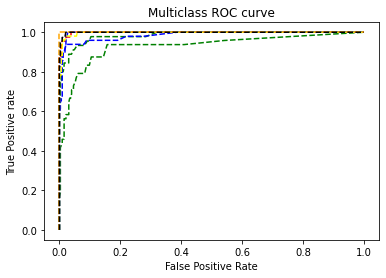

In [128]:
for i in range(n_class): 
    plt.plot(fpr[i], tpr[i], linestyle='--',color=random.choice(color)) 
plt.title('Multiclass ROC curve') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive rate') 
plt.savefig('Multiclass ROC',dpi=300);

# Saving the best model :

In [129]:
import pickle
filename='Best_model_for_GlobalPowerPlant.pkl'
pickle.dump(RFC,open(filename,'wb'))

# Regression models to predict Capacity_mw :

__Variance Inflation Factor :__

In [131]:
# Spliting the dataset

x=df.iloc[:,1:] # Data part
x.head(1)

,latitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,28.1839,6,2011.0,1,801.123775,711.181225,737.20545,817.97725,751.644375


In [133]:
# Target

y=df.capacity_mw
y.head()

0       2.5
1      98.0
2      39.2
3     135.0
4    1800.0
Name: capacity_mw, dtype: float64

In [134]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [135]:
vif_calc()

   VIF Factor             Features
0   13.840238             latitude
1    3.916897         primary_fuel
2   33.319106   commissioning_year
3    8.654102   geolocation_source
4   10.599874  generation_gwh_2014
5   20.947763  generation_gwh_2015
6   24.427231  generation_gwh_2016
7   32.292140  generation_gwh_2017
8   27.166703  generation_gwh_2018


Now, here we will find the highest values, which are 'commissioning_year', 'generation_gwh_2017'.

Now we need to check the individual impact on the target[capacity_mw], from these attributes.

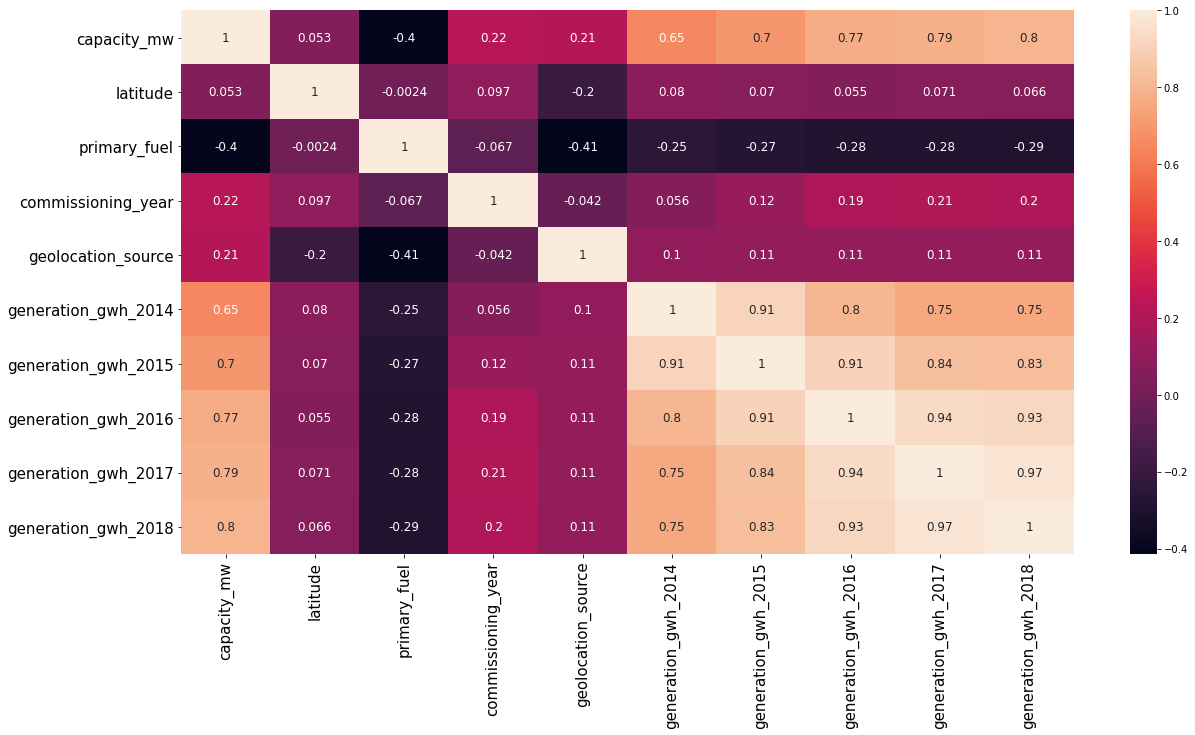

In [137]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, annot_kws={'size':12})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

_From the above correlation we can see that 'commissioning_year', 'generation_gwh_2017' has positive correlation with our target, hence no need to drop them._

# Feature Scaling :

In [138]:
scale=StandardScaler()
x=pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x.head(10)

,latitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.162213,1.169593,1.017502,-1.027592,-0.274829,-0.301614,-0.306339,-0.298643,-0.315789
1,0.601048,-0.981441,0.117077,0.363357,-0.274829,-0.301614,-0.306339,-0.298643,-0.315789
2,0.131029,1.599800,0.117077,0.363357,-0.274829,-0.301614,-0.306339,-0.298643,-0.315789
3,0.454073,-0.551234,0.387204,0.363357,-0.398047,-0.215337,-0.213206,-0.392440,-0.389186
4,0.140306,-0.981441,1.377672,0.363357,1.226920,3.086059,3.139707,2.479704,3.504514
5,0.437276,-0.981441,0.477247,0.363357,-0.038051,0.022283,-0.031847,-0.097952,-0.184096
6,-1.748900,-0.121027,-2.674243,0.363357,-0.707366,-0.665417,-0.729308,-0.741677,-0.727423
7,1.825888,-0.121027,0.927460,0.363357,-0.360005,-0.295005,-0.344819,-0.382817,-0.416647
8,-0.784183,-0.121027,0.387204,0.363357,-0.490255,-0.670468,-0.516123,-0.528938,-0.517865
9,0.337985,-0.981441,0.747375,0.363357,0.455592,0.304868,0.069753,0.154812,0.115112


# Power Transformation :
I will use Yeo-Johnson to transform this dataset so that the resulting features looks more normally distributed. And also reduce skewness and outliers.

In [139]:
power=PowerTransformer(method='yeo-johnson')
x=pd.DataFrame(power.fit_transform(x), columns=x.columns)
x.head()

,latitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.178549,1.153780,1.210496,-1.291234,0.012162,-0.016303,-0.019400,-0.001281,-0.038795
1,0.583709,-1.036864,-0.064019,0.205338,0.012162,-0.016303,-0.019400,-0.001281,-0.038795
2,0.099779,1.442025,-0.064019,0.205338,0.012162,-0.016303,-0.019400,-0.001281,-0.038795
3,0.430787,-0.454661,0.272149,0.205338,-0.374913,0.232454,0.242984,-0.281562,-0.279812
4,0.109177,-1.036864,1.834014,0.205338,1.655976,2.001428,1.989748,1.899946,2.010873


Let's again check our VIF after power transformation

In [140]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [141]:
vif_calc()

   VIF Factor             Features
0    1.052767             latitude
1    1.119064         primary_fuel
2    1.107898   commissioning_year
3    1.073963   geolocation_source
4    3.864947  generation_gwh_2014
5    5.990347  generation_gwh_2015
6   10.469711  generation_gwh_2016
7   12.902335  generation_gwh_2017
8   11.126327  generation_gwh_2018


As we can observe here, after power transformation, the VIF values has reduced to a good exceptable range, and so we can proceed further with this dataset.

# Machine Learning Models :
Here we have a linear case, hence we'll go with Linear Regression and various other regression models.

In [142]:
# Importing the necessary libraries :

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Spliting dataframe and finding best random state 

In [143]:
score=0
random_state=0

for i in range(1, 1000):
    x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred=lr.predict(x_test)
    r2=r2_score(y_test,pred)
    
    if r2>score:
        score=r2
        random_state=i

print("Highest r2 score is", score,"on random state", random_state)

Highest r2 score is 0.5943627388854968 on random state 920


Hence we found our best random state value 920 with highest r2 score 0.59.

# Required Evaluation Metrices :

In [144]:
# Spliting the dataset
def reg(model, x, y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=957)
# Here 20% will be used for testing purpose and rest 80% for training purpose.
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting x_test
    pred=model.predict(x_test)
    
    # Mean square error should be low always
    mse=mean_squared_error(y_test,pred,squared=False)
    print("Mean Square Error Score is:", mse)
    
    # r2 score
    r2=r2_score(y_test,pred,multioutput='variance_weighted')*100
    print("r2 Score is:", r2)
    
    # Cross Validation Score
    cv=(cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv)
    
     
    # Difference between r2 score and cv score
    diff = r2-cv
    print("Difference between r2 Score and Cross Validation Score is", diff)

Now we can call all the models one by one using this function :

In [145]:
# Linear Regression

model=LinearRegression()
reg(model,x,y)

Mean Square Error Score is: 294.1704470286315
r2 Score is: 47.31885050118591
Cross Validation Score: 43.263756365266914
Difference between r2 Score and Cross Validation Score is 4.055094135918999


In [146]:
# Ridge Regression

model=Ridge(alpha=0.001, normalize=True)
reg(model,x,y)

Mean Square Error Score is: 294.11431348205423
r2 Score is: 47.33895379602583
Cross Validation Score: 43.31137615525413
Difference between r2 Score and Cross Validation Score is 4.027577640771696


In [147]:
# Lasso Regression

model=Lasso(alpha=0.001, normalize=True)
reg(model,x,y)

Mean Square Error Score is: 294.1458787839758
r2 Score is: 47.32764968094951
Cross Validation Score: 43.280611701152225
Difference between r2 Score and Cross Validation Score is 4.047037979797288


In [148]:
# ElasticNet

model=ElasticNet (alpha=0.0001)
reg(model,x,y)

Mean Square Error Score is: 294.1675963641542
r2 Score is: 47.31987151166043
Cross Validation Score: 43.266237719286416
Difference between r2 Score and Cross Validation Score is 4.053633792374015


In [149]:
# Support Vector Regression (poly)

model=SVR(kernel='poly', gamma='auto')
reg(model,x,y)

Mean Square Error Score is: 385.934186823713
r2 Score is: 9.325814391851583
Cross Validation Score: 10.104381014869443
Difference between r2 Score and Cross Validation Score is -0.7785666230178592


In [150]:
# Support Vector Regression (linear)

model=SVR(kernel='linear', gamma='auto')
reg(model,x,y)

Mean Square Error Score is: 326.86596475473715
r2 Score is: 34.95759895127704
Cross Validation Score: 32.919360257416415
Difference between r2 Score and Cross Validation Score is 2.0382386938606274


In [151]:
# Support Vector Regression (rbf)

model=SVR(kernel='rbf', gamma='auto')
reg(model,x,y)

Mean Square Error Score is: 419.00484519914176
r2 Score is: -6.879706306234756
Cross Validation Score: -8.132931814150659
Difference between r2 Score and Cross Validation Score is 1.2532255079159027


In [152]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model,x,y)

Mean Square Error Score is: 251.8217654218605
r2 Score is: 61.394988133380224
Cross Validation Score: 62.48756378494175
Difference between r2 Score and Cross Validation Score is -1.0925756515615248


In [153]:
# Random Forest Regressor

model=RandomForestRegressor(n_estimators=10,random_state=40)
reg(model,x,y)

Mean Square Error Score is: 175.08210269182356
r2 Score is: 81.33875265648041
Cross Validation Score: 75.53306667647665
Difference between r2 Score and Cross Validation Score is 5.805685980003759


In [154]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2)
reg(model,x,y)

Mean Square Error Score is: 175.08210269182356
r2 Score is: 81.33875265648041
Cross Validation Score: 75.53306667647665
Difference between r2 Score and Cross Validation Score is 5.805685980003759


In [155]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(n_estimators=120)
reg(model,x,y)

Mean Square Error Score is: 194.0189734307743
r2 Score is: 77.08364367305707
Cross Validation Score: 73.19627104188864
Difference between r2 Score and Cross Validation Score is 3.8873726311684322


In [156]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=100,learning_rate=1.0,random_state=40)
reg(model,x,y)

Mean Square Error Score is: 298.39843609968443
r2 Score is: 45.793639743072724
Cross Validation Score: 45.53713120629846
Difference between r2 Score and Cross Validation Score is 0.25650853677426255


In [157]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=300)
reg(model,x,y)

Mean Square Error Score is: 175.91151529686056
r2 Score is: 81.16152682894152
Cross Validation Score: 78.15573073367634
Difference between r2 Score and Cross Validation Score is 3.0057960952651825


After finding all the scores of various models, we found that ExtraTreesRegressor model gives the highest r2 score, and less difference between r2 score and cross validation score. Hence we choose this model and proceed further with the process.

# Hyper Parameter Tuning :

Applying hyper parameter tuning using Grid Search CV method, to find the best parameters of ExtraTreesRegressor Model

In [ ]:
ExtraTreesRegressor(n_estimators=300,
    criterion={"squared_error", "absolute_error"},
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features={"auto", "sqrt", "log2"},
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=False,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,)

These are the various parameters for ExtraTreesRegressor, which i found by clicking shift+tab buttons inside the function.

First we have to create a dictionary of these parameters so that it can be passsed to the grid search function.

In [158]:
params={'n_estimators':[300],
    'criterion':["squared_error", "absolute_error"],
    'max_features':["auto", "sqrt", "log2"]}

In [159]:
grid=GridSearchCV(ExtraTreesRegressor(), params, cv=5)

In [160]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [300]})

In [161]:
grid.best_params_

{'criterion': 'squared_error', 'max_features': 'auto', 'n_estimators': 300}

So here we have found the best parameters for our model, and now we can finally train our model.

In [163]:
ETR=ExtraTreesRegressor(criterion='squared_error',
                        max_features='auto',
                        n_estimators=300)

In [165]:
ETR.fit(x_train,y_train)
pred=ETR.predict(x_test)
r2=r2_score(y_test, pred)*100
print('r2 score for the final model : ',r2)

r2 score for the final model :  80.29754378694474


# Saving the best model :

In [167]:
import pickle
filename='Best_model_for_Global.pkl'
pickle.dump(ETR,open(filename,'wb'))

__<font color=orange>THANK YOU.</font>__